In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import re
from typing import Union, List

from sklearn.preprocessing import MinMaxScaler

# Functions

# LendingClub

In [2]:
data_path = './LendingClub/'

In [14]:
%%time
df1 = pd.read_csv(data_path+'/accepted_2007_to_2018q4.csv/'+'accepted_2007_to_2018q4.csv', low_memory=False)

CPU times: user 34.4 s, sys: 4.5 s, total: 38.9 s
Wall time: 40.1 s


In [15]:
%%time
df2 = pd.read_csv(data_path+'/rejected_2007_to_2018q4.csv/'+'rejected_2007_to_2018q4.csv', low_memory=False)

CPU times: user 11 s, sys: 2.78 s, total: 13.8 s
Wall time: 14.3 s


In [16]:
len(df1)

2260701

In [17]:
len(df2)

27648741

In [10]:
df.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [31]:
len(df1)

2260701

In [30]:
df1.id.nunique()

2260701

In [18]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df2.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


# Give Me Some Credit

In [20]:
path = './GiveMeSomeCredit/'

In [22]:
%%time
df_test = pd.read_csv(path+'cs-test.csv')

CPU times: user 36.3 ms, sys: 14 ms, total: 50.2 ms
Wall time: 54.2 ms


In [24]:
%%time
df_train = pd.read_csv(path+'cs-training.csv')

CPU times: user 54 ms, sys: 21.3 ms, total: 75.2 ms
Wall time: 90.9 ms


In [32]:
%%time
df_sample = pd.read_csv(path+'sampleEntry.csv')

CPU times: user 15.5 ms, sys: 11.3 ms, total: 26.8 ms
Wall time: 39 ms


In [29]:
len(df_test)

101503

In [28]:
df_test.SeriousDlqin2yrs.isnull().sum()

101503

In [33]:
df_sample.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [23]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [26]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Credit Card Data from Book "Econometric Analysis" by William H. Greene

In [2]:
%%time
path = './'
df = pd.read_csv(path+'AER_credit_card_data.csv')

CPU times: user 4.95 ms, sys: 3.65 ms, total: 8.59 ms
Wall time: 12.7 ms


In [3]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

# Amex 

Features are anonymized and normalized, and fall into the following general categories:
- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

In [3]:
%%time
path = '../datasets/amex-default-prediction/'
amex_train = pd.read_csv(path+'train_data.csv')

CPU times: user 1min 3s, sys: 16 s, total: 1min 19s
Wall time: 1min 25s


In [4]:
%%time
amex_labels = pd.read_csv(path+'train_labels.csv')

CPU times: user 274 ms, sys: 48 ms, total: 323 ms
Wall time: 421 ms


In [5]:
amex_train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [6]:
amex_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [7]:
print('Fraction of defaults:', (amex_labels.target == 1).sum()/len(amex_train))

Fraction of defaults: 0.021482247605555938


In [15]:
amex_labels.loc[amex_labels.target == 1].head().iloc[0].customer_ID

'0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'

In [13]:
amex_labels.loc[amex_labels.target == 1].head()

,customer_ID,target
8,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1
9,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...,1
10,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...,1
11,00013c6e1cec7c21bede7cb319f1e28eb994f5625257f4...,1
12,0001812036f1558332e5c0880ecbad70b13a6f28ab04a8...,1


In [8]:
default1 = amex_train.loc[amex_train.customer_ID == '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85']

# STOPPED HERE
Understanding the defaults in Problem overview in https://developer.nvidia.com/blog/predicting-credit-defaults-using-time-series-models-with-recursive-neural-networks-and-xgboost/

In [11]:
default1

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-03-15,0.400025,0.000278,0.954861,0.023890,0.003140,NaN,0.008421,1.175081,...,NaN,NaN,NaN,1.002518,0.001170,0.870115,0.141214,1.003923,0.008945,0.736632
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-04-14,0.405788,0.000269,0.944042,0.025613,0.008950,NaN,0.003707,1.177973,...,NaN,NaN,NaN,1.005944,0.003116,0.864712,0.145885,1.004833,0.002125,0.733311
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-05-15,0.403615,0.032850,0.940261,0.026016,0.009074,NaN,0.008000,1.175785,...,NaN,NaN,NaN,1.006883,0.004455,0.871729,0.144555,1.000521,0.000765,0.729252
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-06-14,0.391495,0.034461,0.936253,0.029538,0.005778,NaN,0.002849,1.174704,...,NaN,NaN,NaN,1.000132,0.002175,0.869414,0.151890,1.001034,0.008195,0.727660
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-07-15,0.392356,0.037955,0.915764,0.028671,0.008595,NaN,0.002428,1.177958,...,NaN,NaN,NaN,1.001192,0.004609,0.869089,0.152654,1.007116,0.001493,0.727649
109,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-08-15,0.401854,0.037644,0.916998,0.025473,0.000882,NaN,0.008978,1.174443,...,NaN,NaN,NaN,1.001985,0.002808,0.872574,0.161635,1.000121,0.000795,0.728578
110,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-09-14,0.413979,0.037810,0.920879,0.026374,0.005886,NaN,0.008085,1.172816,...,NaN,NaN,NaN,1.002934,0.001223,0.871060,0.169187,1.002862,0.007641,0.737226
111,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-10-14,0.413900,0.036082,0.916793,0.024629,0.008220,NaN,0.002384,1.164730,...,NaN,NaN,NaN,1.009672,0.007612,0.868228,0.168932,1.001409,0.003188,0.824853
112,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-11-14,0.408234,0.030466,0.912386,0.020954,0.003926,NaN,0.005525,1.170353,...,NaN,NaN,NaN,1.000569,0.004888,0.873915,0.169258,1.002945,0.004917,0.731010
113,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-12-17,0.408131,0.097428,0.932366,0.020943,0.008163,0.166899,0.004582,1.163413,...,NaN,NaN,NaN,1.002598,0.000091,0.870157,0.173529,1.003708,0.007586,0.733164


In [19]:
amex_train.date.head().dt.weekday

0    3
1    4
2    6
3    1
4    6
Name: date, dtype: int32

In [21]:
%%time
# Convert to datetime
amex_train.insert(1, 'date', pd.to_datetime(amex_train['S_2']))
# Time variables
amex_train.insert(2, 'year', amex_train['date'].dt.year)
amex_train.insert(2, 'month', amex_train['date'].dt.month)
amex_train.insert(2, 'weekday', amex_train['date'].dt.weekday)

CPU times: user 264 ms, sys: 13.5 ms, total: 277 ms
Wall time: 279 ms


In [22]:
amex_train.head(3)

,customer_ID,date,weekday,month,year,S_2,P_2,D_39,B_1,B_2,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,3,3,2017,2017-03-09,0.938469,0.001733,0.008724,1.006838,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,4,4,2017,2017-04-07,0.936665,0.005775,0.004923,1.000653,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,6,5,2017,2017-05-28,0.954180,0.091505,0.021655,1.009672,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603


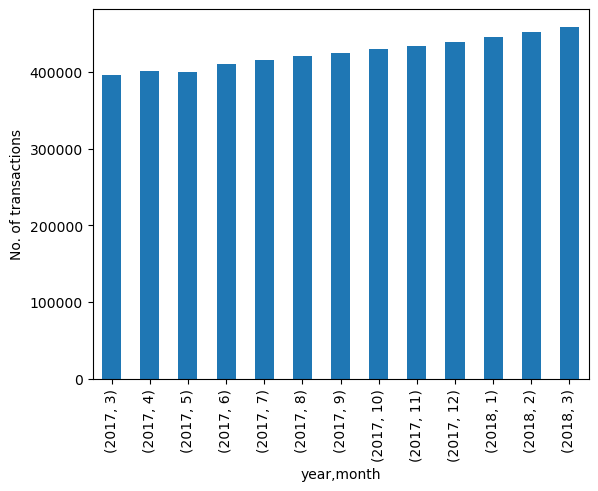

CPU times: user 228 ms, sys: 31.5 ms, total: 260 ms
Wall time: 175 ms


In [31]:
%%time
fig, ax = plt.subplots()
amex_train.groupby(['year', 'month']).size().plot(kind='bar', ax=ax)
ax.set_ylabel('No. of transactions')

plt.show()

# Home Credit Default Risk

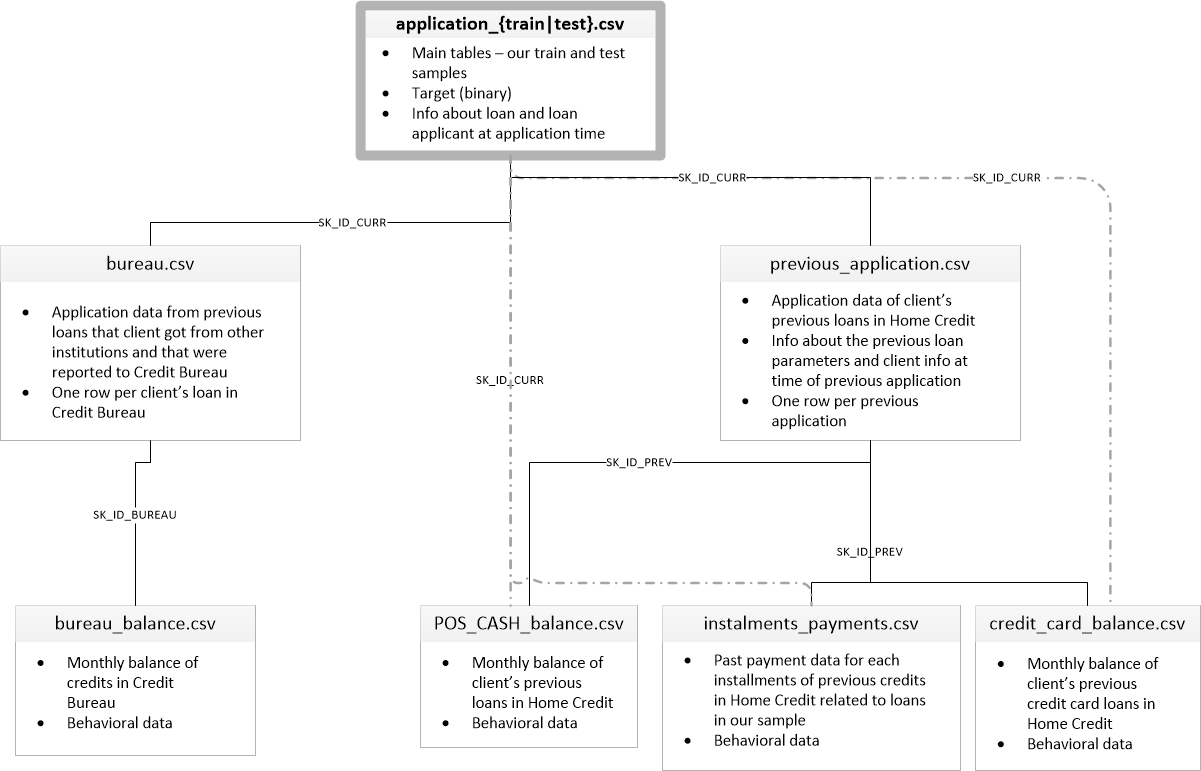

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='./home-credit-default-risk/home_credit_default_scheme.png', width=800, height=800)

In [12]:
%%time
path = './home-credit-default-risk/'
application_train = pd.read_csv(path+'application_train.csv')
bureau = pd.read_csv(path+'bureau.csv')
bureau_balance = pd.read_csv(path+'bureau_balance.csv')
prev_application = pd.read_csv(path+'previous_application.csv')
pos_cash_balance = pd.read_csv(path+'POS_CASH_balance.csv')
installments_payments = pd.read_csv(path+'installments_payments.csv')
credit_card_balance = pd.read_csv(path+'credit_card_balance.csv')

CPU times: user 15.1 s, sys: 1.94 s, total: 17 s
Wall time: 17.2 s


In [13]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [15]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [16]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [18]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [19]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Fannie Mae

In [756]:
DATA_PATH = '../datasets/FannieMae/'
glossary = pd.read_excel(path+'crt-file-layout-and-glossary_0.xlsx')
glossary = glossary[~glossary.isna().all(axis=1)] # Remove nan rows
glossary_cols =  glossary['Field Name'].loc[~glossary['Field Name'].isnull()].reset_index(drop=True)

In [759]:
def load_fanniemae_sf(path: str, 
                      Y: Union[int, list]=None, 
                      Q: Union[int, str]=None, 
                      cols: List[str]=None, 
                      selected_features: List[str]=None) -> pd.DataFrame:
    # Files to load
    if isinstance(Y, int):
        Y = [Y]  # Convert single year to list
    if isinstance(Q, int):
        Q = [Q]  # Convert single quarter to list
    files = []
    for year in Y:
        if Q == 'all':
            pattern = os.path.join(path, f"{year}Q*.csv")
            files.extend(glob.glob(pattern))
        else:
            for quarter in Q:
                pattern = os.path.join(path, f"{year}Q{quarter}.csv")
                files.extend(glob.glob(pattern))
    print("Files to load:", files)
    df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)

    # Select Features
    if selected_features is None:
        sf_fields = glossary[~glossary['Single-Family (SF) Loan Performance'].isna()]['Field Name'].to_list()
        df = df[sf_fields]
    else:
        df = df[selected_features]
        
    # Format column names
    df.rename(columns={s:'_'.join(s.strip().lower().split()).replace('-', '_') for s in selected_features}, inplace=True)

    # Time features
    df.insert(1, 'time', pd.to_datetime(df['monthly_reporting_period'], format='%m%Y'))
    df.insert(2, 'year', df.time.dt.year)
    df.drop('monthly_reporting_period', axis=1, inplace=True)

    # Rename columns
    df.rename(columns={
        'current_loan_delinquency_status':'delinquency_status',
                }, inplace=True) 
    return df

In [588]:
%%time
df05 = load_fanniemae_sf(DATA_PATH, Y=2005, Q=1, cols=cols, selected_features=select_fields)

Files to load: ['../datasets/FannieMae/2005Q1.csv']


/var/folders/x6/nm550mg94y75s74djxxkq6kw0000gr/T/ipykernel_21885/1685962122.py:21: DtypeWarning: Columns (40,101,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)


CPU times: user 54.4 s, sys: 32.6 s, total: 1min 27s
Wall time: 1min 41s


## Feature selection

In [757]:
selected_fields=[
'Loan Identifier',
'Monthly Reporting Period',
'Channel',
'Original Interest Rate',
'Current Interest Rate',
'Original UPB',
'Current Actual UPB',
'Original Loan Term',
'Loan Age',
'Remaining Months To Maturity',
'Original Loan to Value Ratio (LTV)',
'Original Combined Loan to Value Ratio (CLTV)',
'Number of Borrowers',
'Debt-To-Income (DTI)',
'Borrower Credit Score at Origination',
'Co-Borrower Credit Score at Origination',
'First Time Home Buyer Indicator',
'Loan Purpose ',
'Property Type',
'Number of Units',
'Occupancy Status',
'Property State',
'Metropolitan Statistical Area (MSA)',
'Zip Code Short',
'Mortgage Insurance Percentage',
'Amortization Type',
'Prepayment Penalty Indicator',
'Interest Only Loan Indicator',
'Interest Only First Principal And Interest Payment Date',
'Months to Amortization',
'Current Loan Delinquency Status',
'Zero Balance Code',
'Zero Balance Effective Date',
'UPB at the Time of Removal',
'Total Principal Current',
'Last Paid Installment Date',
'Foreclosure Date',
'Special Eligibility Program',
'Property Valuation Method ',
'High Balance Loan Indicator ',
'Borrower Assistance Plan',
'Alternative Delinquency Resolution',
'Alternative Delinquency  Resolution Count']

### Notes

- Check features that are present in 'SF Loan Performance: Enhanced format with the October 2020 Release'
- Features 'Origination Date', 'First Payment Date', 'Maturity Date' has to convert to date
- Double check 'Loan Age' for negative values and nan
- Everything related to or after foreclosure is excluded
- Features related to Covid-19: 'Alternative Delinquency Resolution', 'Alternative Delinquency  Resolution Count'

In [475]:
feature = 'Alternative Delinquency  Resolution Count'

print(feature, '\n')
if feature in df_missing.index:
    print(f'Missing values: {df_missing.loc[feature].freq.round(6)*100:.4f}% missing values.')
else:
    print(f'No missing values.')
print(f'Number of unique values: {df[feature].nunique()}')

Alternative Delinquency  Resolution Count 

Missing values: 99.9240% missing values.
Number of unique values: 2


In [476]:
df[feature].sample(10)

1051490   NaN
1271527   NaN
1871826   NaN
3155123   NaN
2787929   NaN
3146109   NaN
3171525   NaN
1737404   NaN
1254018   NaN
3835307   NaN
Name: Alternative Delinquency  Resolution Count, dtype: float64

In [481]:
df[feature].nunique()

2

In [474]:
df[feature].unique()

array(['7', 'P', 7, 'C', 'D'], dtype=object)

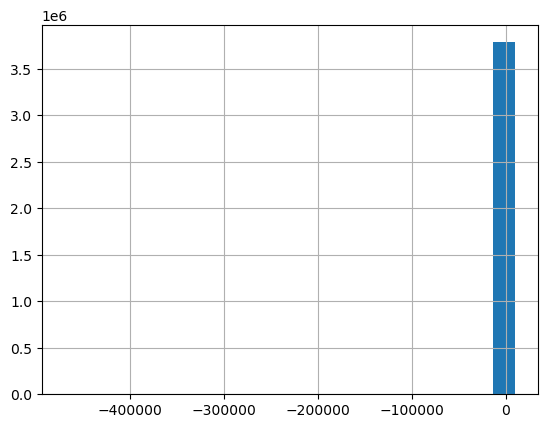

In [450]:
fig, ax = plt.subplots()
df[feature].loc[df[feature] < 1e4].hist(bins=20, ax=ax)
ax.set_xscale('linear')

<Axes: xlabel='Alternative Delinquency Resolution'>

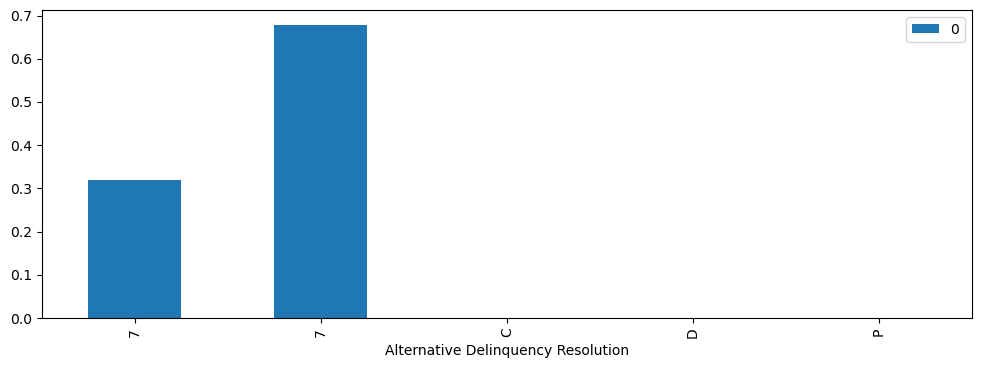

In [473]:
fig, ax = plt.subplots(figsize=(12, 4))
(df.groupby(feature).size().to_frame()/df.shape[0]).plot(kind='bar', ax=ax)

## Missing values

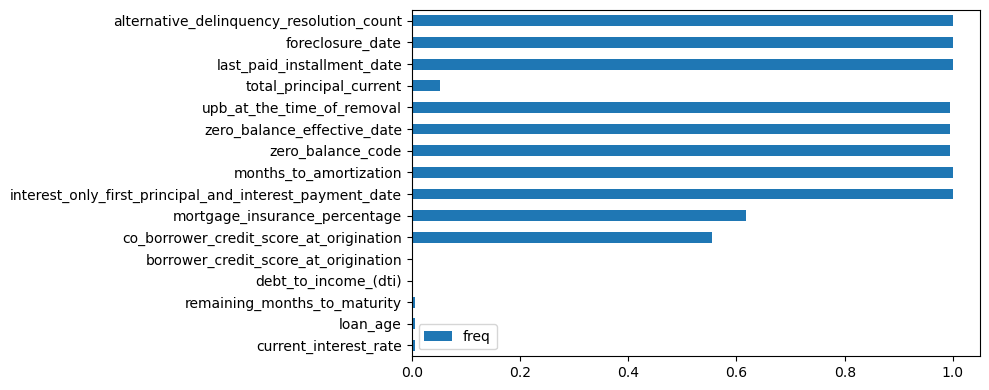

In [572]:
fig, ax = plt.subplots(figsize=(10, 4))

def missing(df):
    missing_values = df.isna().sum()/len(df)
    missing_values = pd.DataFrame(missing_values.loc[missing_values != 0], 
                                  columns=['freq'])#.reset_index(names='Field Name')#.sort_values(by='freq')
    return missing_values

def plot_missing(df_missing, ax=None):
    df_missing.plot(kind='barh', ax=ax)

df_missing = missing(df)
plot_missing(df_missing, ax=ax)

plt.tight_layout()
plt.show()

## Agreggate years

In [588]:
%%time
df05 = load_fanniemae_sf(path, Y=2005, Q=1, cols=cols, selected_features=select_fields)

Files to load: ['../datasets/FannieMae/2005Q1.csv']


/var/folders/x6/nm550mg94y75s74djxxkq6kw0000gr/T/ipykernel_21885/1685962122.py:21: DtypeWarning: Columns (40,101,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)


CPU times: user 54.4 s, sys: 32.6 s, total: 1min 27s
Wall time: 1min 41s


In [738]:
%%time
df05Q2 = load_fanniemae_sf(path, Y=2005, Q=2, cols=cols, selected_features=select_fields)

Files to load: ['../datasets/FannieMae/2005Q2.csv']


/var/folders/x6/nm550mg94y75s74djxxkq6kw0000gr/T/ipykernel_21885/322349858.py:21: DtypeWarning: Columns (40,101,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)


CPU times: user 59.9 s, sys: 37.1 s, total: 1min 36s
Wall time: 1min 52s


In [783]:
%%time
df23Q1 = load_fanniemae_sf(path, Y=2023, Q=1, cols=glossary_cols, selected_features=selected_fields)

Files to load: ['../datasets/FannieMae/2023Q1.csv']


/var/folders/x6/nm550mg94y75s74djxxkq6kw0000gr/T/ipykernel_21885/4065276026.py:21: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)


CPU times: user 9.68 s, sys: 2.84 s, total: 12.5 s
Wall time: 12.9 s


In [739]:
del df

In [608]:
df = pd.concat([df05, df23])

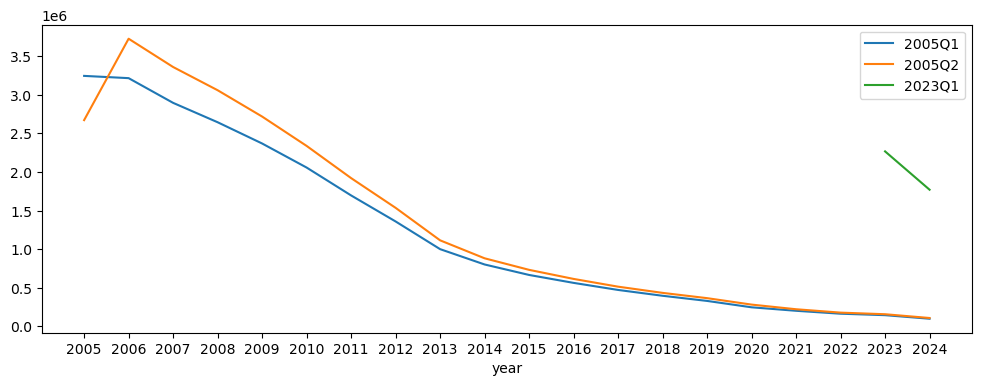

In [785]:
fig, ax = plt.subplots(figsize=(12, 4))

df05.groupby('year')['loan_identifier'].size().plot(ax=ax, label='2005Q1')
df05Q2.groupby('year')['loan_identifier'].size().plot(ax=ax, label='2005Q2')
df23Q1.groupby('year')['loan_identifier'].size().plot(ax=ax, label='2023Q1')
# df.groupby('year')['loan_identifier'].size().plot(ax=ax, label='Aggregate')

ax.legend()
ax.set_xticks(np.arange(2005, 2025))

plt.show()

### Split years


In [719]:
AGG_PATH = DATA_PATH+'aggregate_years/'

In [741]:
df05Q2['acquisition'] = '2005Q2'

In [771]:
pd.DataFrame(df2005_2.acquisition.unique(), columns=['acquisition'])

,acquisition
0,2005Q1
1,2005Q2


In [772]:
def split_years(save_path: str, df: pd.DataFrame):
    ''' Split years and save each year in a separate csv file.'''
    for y in df.year.unique():
        
        df_year = df.loc[df.year == y]  # Filter year
        # Save path
        file_path = f'{save_path}agg_{y}.csv'
        meta_path = f'{save_path}agg_{y}_meta.csv'
        
        # Check if file exists before reading
        if os.path.exists(file_path):
            df_agg = pd.read_csv(file_path)  # Load existing data
            df_agg = pd.concat([df_agg, df_year], ignore_index=True)  # Append new data
        else:
            df_agg = df_year  # Start a new DataFrame if the file doesn’t exist

        # Save the updated DataFrame
        df_agg.to_csv(file_path, index=False)
        # Meta data
        df_meta = pd.DataFrame(df_agg['acquisition'].unique(), columns=['acquisition'])
        df_meta.to_csv(meta_path)


In [791]:
def aggregate_fanniemae(input_path: str, 
                        output_path: str, 
                        years: List[int], 
                        quarters: List[int], 
                        cols: pd.Series, 
                        selected_features: List[str]) -> None:
    for y in years:
        if quarters == 'all':
            quarters = [1, 2, 3, 4]
        for q in quarters:
            df = load_fanniemae_sf(input_path, Y=y, Q=q, cols=cols, selected_features=selected_features)
            print(f'Saving {y}Q{q}')
            split_years(output_path, df)

In [ ]:
YEAR_LIST = [2005]
QUARTER_LIST = [1, 2]
aggregate_fanniemae(DATA_PATH, AGG_PATH, YEAR_LIST, QUARTER_LIST, cols=glossary_cols, selected_features=selected_fields)

Files to load: ['../datasets/FannieMae/2005Q1.csv']


/var/folders/x6/nm550mg94y75s74djxxkq6kw0000gr/T/ipykernel_21885/4065276026.py:21: DtypeWarning: Columns (40,101,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f, sep='|', names=cols) for f in files], ignore_index=True)


In [744]:
%%time
split_years(df05Q2)

Saving 2005
Saving 2006
Saving 2007
Saving 2008
Saving 2009
Saving 2010
Saving 2011
Saving 2012
Saving 2013
Saving 2014
Saving 2015
Saving 2016
Saving 2017
Saving 2018
Saving 2019
Saving 2020


<timed exec>:6: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.


Saving 2021
Saving 2022
Saving 2023
Saving 2024
CPU times: user 9min 6s, sys: 43.6 s, total: 9min 50s
Wall time: 9min 56s


In [727]:
%%time
df2005 = pd.read_csv(f'{AGG_PATH}agg_2005.csv')

CPU times: user 3.56 s, sys: 864 ms, total: 4.43 s
Wall time: 4.5 s


In [745]:
%%time
df2005_2 = pd.read_csv(f'{AGG_PATH}agg_2005.csv')

<timed exec>:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 6.42 s, sys: 1.6 s, total: 8.02 s
Wall time: 8.23 s


In [753]:
df05.delinquency_status.unique()

array([  0., -inf,   1.,   2.,   3.,   4.,   5.,   6.,  10.,  11.,  12.,
        13.,   7.,   8.,   9.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99.])

In [754]:
df05Q2.delinquency_status.unique()

array(['00', '01', 'XX', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '45', '46', '63', '64',
       '65', '66', '67', '68', '69', '71', '70', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '99', '93', '94', '95', '96',
       '97', '98'], dtype=object)

In [749]:
df2005_2.iloc[:, 31].unique()

array([0.0, -inf, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
       '0.0', '-inf', '1.0', '2.0', '00', 'XX', '01', '02', '03', '04',
       '05', '06', '07', '08'], dtype=object)

In [750]:
df2005_2

,loan_identifier,time,year,channel,original_interest_rate,current_interest_rate,original_upb,current_actual_upb,original_loan_term,loan_age,...,total_principal_current,last_paid_installment_date,foreclosure_date,special_eligibility_program,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,alternative_delinquency_resolution,alternative_delinquency_resolution_count,acquisition
0,100000102115,2005-03-01,2005,C,4.500,4.500,95000.0,0.00,120,0.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
1,100000102115,2005-04-01,2005,C,4.500,4.500,95000.0,0.00,120,1.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
2,100000102115,2005-05-01,2005,C,4.500,4.500,95000.0,0.00,120,2.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
3,100000102115,2005-06-01,2005,C,4.500,4.500,95000.0,0.00,120,3.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
4,100000102115,2005-07-01,2005,C,4.500,4.500,95000.0,0.00,120,4.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917728,999991120469,2005-08-01 00:00:00,2005,C,5.625,5.625,76000.0,0.00,360,6.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q2
5917729,999991120469,2005-09-01 00:00:00,2005,C,5.625,5.625,76000.0,0.00,360,7.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q2
5917730,999991120469,2005-10-01 00:00:00,2005,C,5.625,5.625,76000.0,74792.99,360,8.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q2
5917731,999991120469,2005-11-01 00:00:00,2005,C,5.625,5.625,76000.0,74706.08,360,9.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q2


In [728]:
df2005

,loan_identifier,time,year,channel,original_interest_rate,current_interest_rate,original_upb,current_actual_upb,original_loan_term,loan_age,...,total_principal_current,last_paid_installment_date,foreclosure_date,special_eligibility_program,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,alternative_delinquency_resolution,alternative_delinquency_resolution_count,acquisition
0,100000102115,2005-03-01,2005,C,4.500,4.500,95000.0,0.00,120,0.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
1,100000102115,2005-04-01,2005,C,4.500,4.500,95000.0,0.00,120,1.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
2,100000102115,2005-05-01,2005,C,4.500,4.500,95000.0,0.00,120,2.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
3,100000102115,2005-06-01,2005,C,4.500,4.500,95000.0,0.00,120,3.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
4,100000102115,2005-07-01,2005,C,4.500,4.500,95000.0,0.00,120,4.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245630,999996197450,2005-08-01,2005,C,5.625,5.625,120000.0,0.00,360,6.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
3245631,999996197450,2005-09-01,2005,C,5.625,5.625,120000.0,119486.16,360,7.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
3245632,999996197450,2005-10-01,2005,C,5.625,5.625,120000.0,119353.15,360,8.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1
3245633,999996197450,2005-11-01,2005,C,5.625,5.625,120000.0,119219.52,360,9.0,...,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,2005Q1


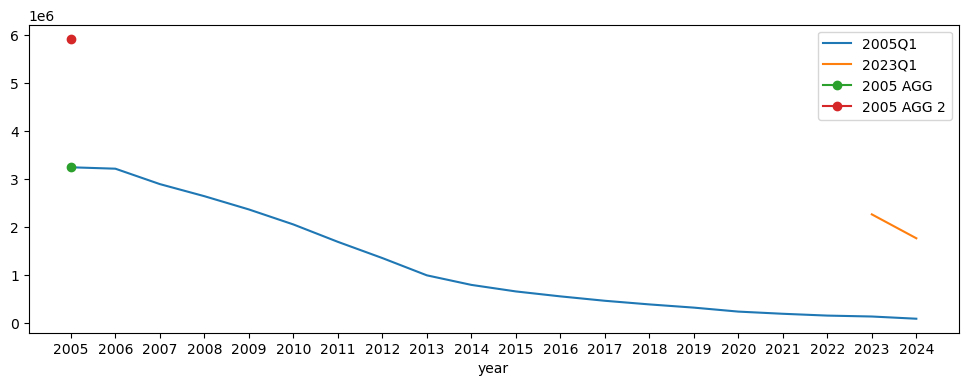

In [751]:
fig, ax = plt.subplots(figsize=(12, 4))

df05.groupby('year')['loan_identifier'].size().plot(ax=ax, label='2005Q1')
df23.groupby('year')['loan_identifier'].size().plot(ax=ax, label='2023Q1')
ax.plot(2005, len(df2005), marker='o', label='2005 AGG')
ax.plot(2005, len(df2005_2), marker='o', label='2005 AGG 2')

ax.legend()
ax.set_xticks(np.arange(2005, 2025))

plt.show()

## Definition of Default

- Two variable are used to define default: 'Zero Balance Code' and the delinquency status ('Current Loan Delinquency Status')
- Zero Balance Codes that are a default event: 3, 6, 9
- Delinquency status can be 3 months (> 90 days) or 6 months (> 180 days), etc.

### Delinquency Status

In [634]:
df05.zero_balance_code.value_counts(dropna=False)

zero_balance_code
NaN     24266914
1.0       277494
9.0         8866
16.0        2246
3.0         2023
2.0         1199
15.0         858
6.0          570
Name: count, dtype: int64

In [637]:
df05.delinquency_status.value_counts(dropna=False)

delinquency_status
00    23122655
01      511383
XX      282663
02      150212
03       71131
        ...   
94          96
95          89
97          82
96          81
98          73
Name: count, Length: 101, dtype: int64

In [640]:
dlq_zb = df05.groupby(['delinquency_status', 'zero_balance_code']).size().to_frame().rename(columns={0:'Counts'})

In [673]:
dlq_zb

Counts
delinquency_status zero_balance_code        
00                 1.0                  9292
                   3.0                     1
                   6.0                     1
                   15.0                  181
                   16.0                 1053
...                                      ...
XX                 3.0                  2010
                   6.0                   569
                   9.0                  8804
                   15.0                  677
                   16.0                 1193

[95 rows x 1 columns]

In [680]:
dlq_zb.xs('XX', level='delinquency_status', drop_level=False)

Counts
delinquency_status zero_balance_code        
XX                 1.0                268202
                   2.0                  1139
                   3.0                  2010
                   6.0                   569
                   9.0                  8804
                   15.0                  677
                   16.0                 1193

In [705]:
%%time
df05.delinquency_status = df05.delinquency_status.replace('XX', -np.inf)
df05.delinquency_status = df05.delinquency_status.astype(float)

CPU times: user 2.05 s, sys: 112 ms, total: 2.16 s
Wall time: 2.16 s


In [707]:
%%time
df.delinquency_status = df.delinquency_status.replace('XX', -np.inf)
df.delinquency_status = df.delinquency_status.astype(float)

CPU times: user 2.37 s, sys: 205 ms, total: 2.58 s
Wall time: 2.59 s


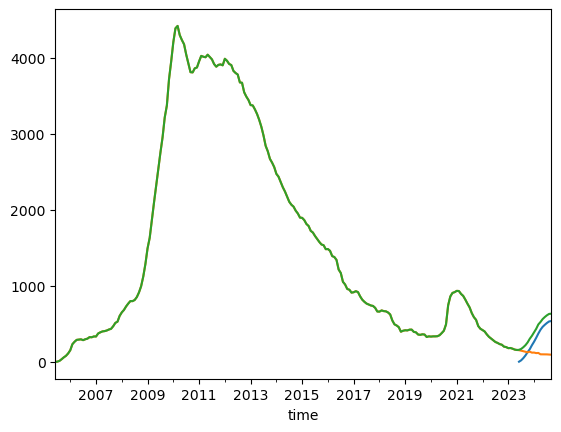

In [708]:
fig, ax = plt.subplots()

df23.loc[df23.delinquency_status >= 6].groupby('time').size().plot(ax=ax)
df05.loc[df05.delinquency_status >= 6].groupby('time').size().plot(ax=ax)
df.loc[df.delinquency_status >= 6].groupby('time').size().plot(ax=ax)

plt.show()

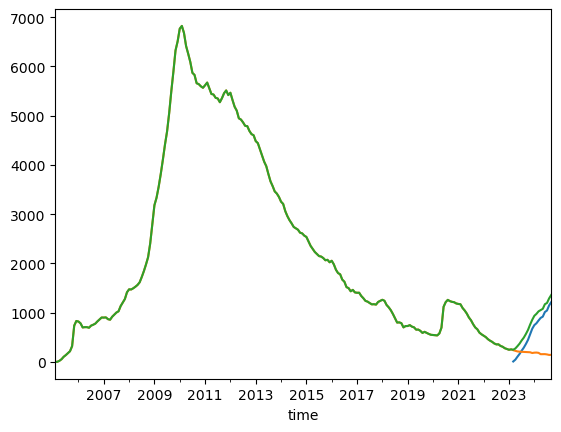

In [709]:
fig, ax = plt.subplots()

df23.loc[df23.delinquency_status >= 3].groupby('time').size().plot(ax=ax)
df05.loc[df05.delinquency_status >= 3].groupby('time').size().plot(ax=ax)
df.loc[df.delinquency_status >= 3].groupby('time').size().plot(ax=ax)

plt.show()

### Zero Balance Code

<Axes: >

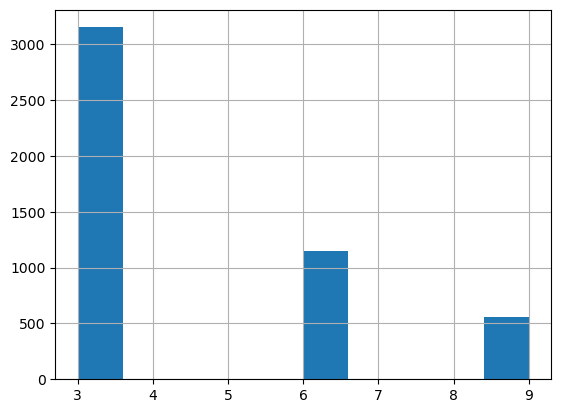

In [584]:
df.loc[df.delinquency_status.isin([3, 6, 9])].delinquency_status.hist()

In [575]:
df.current_loan_delinquency_status

0          0
1          0
2          0
3          0
4          0
          ..
4037218    0
4037219    0
4037220    0
4037221    0
4037222    0
Name: current_loan_delinquency_status, Length: 4037223, dtype: int64

In [32]:
def default(df):
    
    return df.loc[(df.zb.isin([3, 6, 9]))|(df.dlq >= 3)].groupby('time').size()

In [7]:
%%time
df24q1_def = default_df(df24q1)

KeyError: "['Current Loan Delinquency Status', 'Zero Balance Code'] not in index"

<Axes: xlabel='time'>

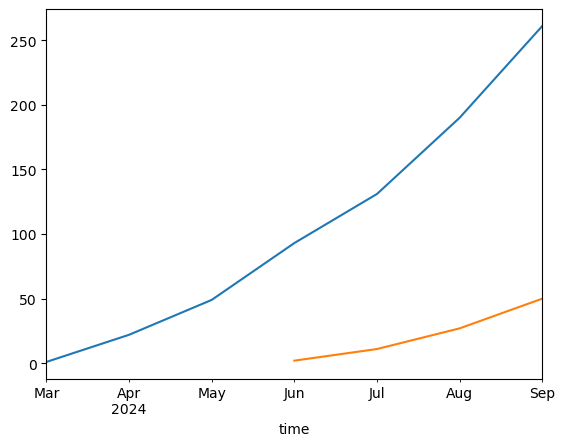

In [13]:
fig, ax = plt.subplots()

df24q1.loc[df24q1.dlq >= 3].groupby('time').size().plot(ax=ax)
df24q1.loc[df24q1.dlq >= 6].groupby('time').size().plot(ax=ax)

In [19]:
pd.concat([df24q1.loc[df24q1.dlq >= 3].groupby('time').size(),
           df24q1.loc[df24q1.dlq >= 6].groupby('time').size()], axis=1).fillna(0)

,0,1
time,,
2024-03-01,1,0.0
2024-04-01,22,0.0
2024-05-01,49,0.0
2024-06-01,93,2.0
2024-07-01,131,11.0
2024-08-01,190,27.0
2024-09-01,261,50.0


In [37]:
df24q1.loc[df24q1.zb.isin([3, 6, 9])]

,Reference Pool ID,id,Monthly Reporting Period,time,year,Channel,Seller Name,Servicer Name,Master Servicer,Original Interest Rate,...,ARM Plan Number,Borrower Assistance Plan,High Loan to Value (HLTV) Refinance Option Indicator,Deal Name,Repurchase Make Whole Proceeds Flag,Alternative Delinquency Resolution,Alternative Delinquency Resolution Count,Total Deferral Amount,Payment Deferral Modification Event Indicator,Interest Bearing UPB
2092,NaN,137581683,82024,2024-08-01,2024,C,Other,NaN,NaN,7.500,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
3680,NaN,137581862,22024,2024-02-01,2024,R,NewRez LLC,NaN,NaN,8.125,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
17071,NaN,137583380,72024,2024-07-01,2024,R,Other,NaN,NaN,6.875,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
24607,NaN,137584231,82024,2024-08-01,2024,R,"Wells Fargo Bank, N.A.",NaN,NaN,7.625,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
33590,NaN,137585250,52024,2024-05-01,2024,R,"CrossCountry Mortgage, LLC",NaN,NaN,6.250,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461656,NaN,138000322,82024,2024-08-01,2024,R,Other,NaN,NaN,6.600,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
1465009,NaN,138000806,42024,2024-04-01,2024,C,Other,NaN,NaN,6.500,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
1465223,NaN,138000838,62024,2024-06-01,2024,B,"Rocket Mortgage, LLC",NaN,NaN,6.990,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN
1481762,NaN,138003225,42024,2024-04-01,2024,R,Other,NaN,NaN,6.375,...,NaN,7,N,NaN,Y,7,NaN,NaN,7,NaN


In [19]:
pd.concat([df24q1.loc[df24q1.dlq >= 3].groupby('time').size(),
           df24q1.loc[df24q1.dlq >= 6].groupby('time').size()], axis=1).fillna(0)

,0,1
time,,
2024-03-01,1,0.0
2024-04-01,22,0.0
2024-05-01,49,0.0
2024-06-01,93,2.0
2024-07-01,131,11.0
2024-08-01,190,27.0
2024-09-01,261,50.0


In [33]:
default_df(df24q1)

time
2024-02-01      1
2024-03-01      3
2024-04-01     31
2024-05-01     53
2024-06-01    109
2024-07-01    153
2024-08-01    222
2024-09-01    320
dtype: int64

In [11]:
df_def.zb.value_counts()

zb
1.0     241245
9.0       2685
6.0        980
2.0        494
16.0       343
3.0        154
15.0        88
Name: count, dtype: int64

In [19]:
df2012Q1_def = df2012Q1[['time', 'Current Loan Delinquency Status', 'Zero Balance Code']].rename(
    columns={'Current Loan Delinquency Status':'dlq', 'Zero Balance Code':'zb'})
df2012Q1_def.loc[df2012Q1_def.zb.isin([3, 6, 9])]

,time,dlq,zb
54630,2017-08-01,XX,9.0
108104,2012-07-01,XX,6.0
142756,2017-02-01,XX,9.0
252834,2013-01-01,XX,9.0
265332,2017-07-01,XX,9.0
...,...,...,...
48536844,2014-11-01,XX,9.0
48578985,2017-05-01,XX,9.0
48591761,2017-03-01,XX,9.0
48609564,2013-05-01,XX,6.0


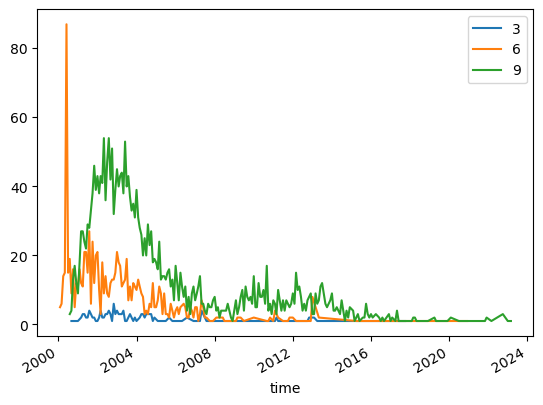

In [12]:
fig, ax  = plt.subplots()

for z in [3, 6, 9]:
    df_def.loc[df_def.zb == z].groupby('time').size().plot(ax=ax, label=str(z))

ax.legend()

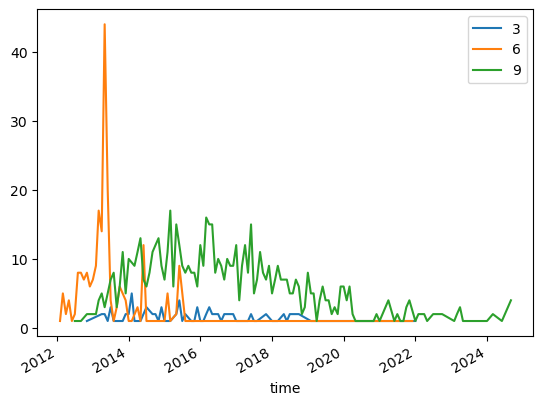

In [21]:
fig, ax  = plt.subplots()

for z in [3, 6, 9]:
    df2012Q1_def.loc[df2012Q1_def.zb == z].groupby('time').size().plot(ax=ax, label=str(z))

ax.legend()

In [20]:
def plot_def(df_def, startY=None, endY=None, zb_codes=[], df_label=None, ax=None):
    
    for z in zb_codes:
        df_date = df_def.loc[(df_def.time.dt.year >= startY)&(df_def.time.dt.year <= endY)]
        df_date.loc[df_date.zb == z].groupby('time').size().plot(ax=ax, label=str(z)+' '+df_label)
    
    ax.legend()

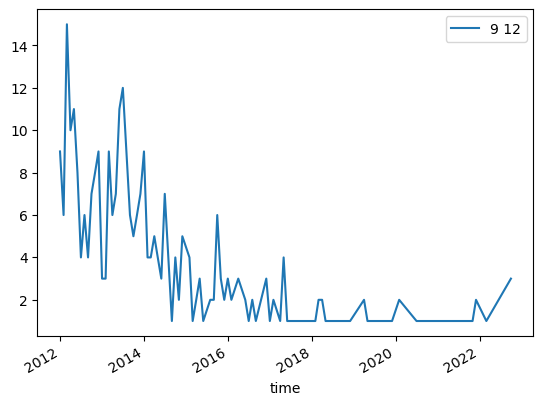

In [21]:
fig, ax = plt.subplots()

plot_def(df00q1_def, startY=2012, endY=2022, zb_codes=[9], df_label='12', ax=ax)

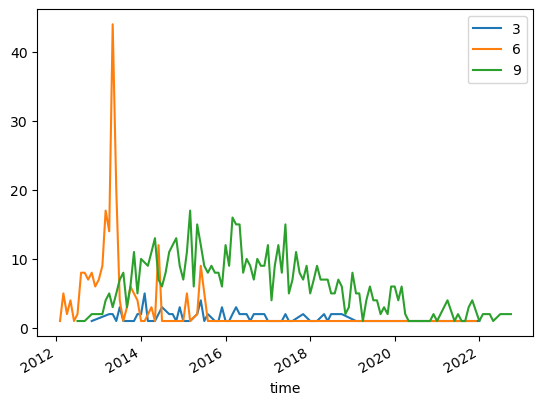

In [24]:
fig, ax  = plt.subplots()

for z in [3, 6, 9]:
    df_date = df2012Q1_def.loc[(df2012Q1_def.time.dt.year >= 2012)&(df2012Q1_def.time.dt.year <= 2022)]
    df_date.loc[df_date.zb == z].groupby('time').size().plot(ax=ax, label=str(z))

ax.legend()

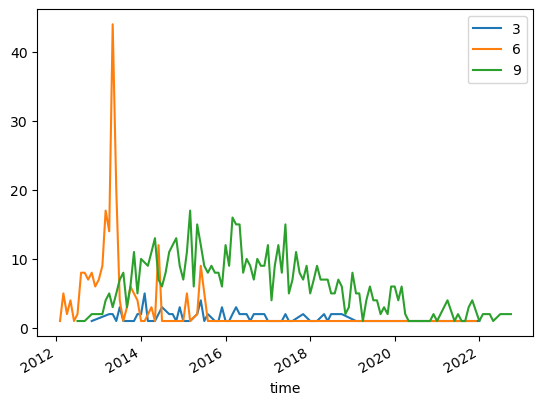

In [24]:
fig, ax  = plt.subplots()

for z in [3, 6, 9]:
    df_date = df2012Q1_def.loc[(df2012Q1_def.time.dt.year >= 2012)&(df2012Q1_def.time.dt.year <= 2022)]
    df_date.loc[df_date.zb == z].groupby('time').size().plot(ax=ax, label=str(z))

ax.legend()

## Macro

<Axes: xlabel='time'>

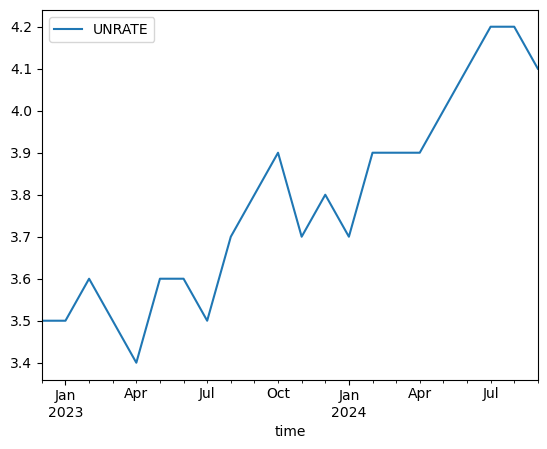

In [198]:
pd.concat([df_def.loc[df_def.dlq >= 3].groupby('time', as_index=False).size().set_index('time'), 
           uer.set_index('time')], axis=1).dropna().plot(y='UNRATE')



In [251]:
def load_fred(file_name, path):
    df = pd.read_csv(path+file_name)
    df['time'] = pd.to_datetime(df.observation_date)
    df.drop('observation_date', axis=1, inplace=True)
    return df

In [304]:
# Unemployment rate
uer = pd.read_csv(path+'macro/UNRATE.csv')
uer['time'] = pd.to_datetime(uer.observation_date)
uer.drop('observation_date', axis=1, inplace=True)

In [292]:
# House Price Index
# S&P CoreLogic Case-Shiller U.S. National Home Price Index (CSUSHPISA)
hpi = pd.read_csv(path+'macro/CSUSHPISA.csv')
hpi['time'] = pd.to_datetime(hpi.observation_date)
hpi.drop('observation_date', axis=1, inplace=True)

In [293]:
# Interest Rates
ir30 = load_fred('MORTGAGE30US.csv', path+'macro/')
ir15 = load_fred('MORTGAGE15US.csv', path+'macro/')

In [320]:
# GDP
gdp = load_fred('GDP.csv', path+'macro/')

In [321]:
gdp=pd.DataFrame(pd.concat([df_def.loc[df_def.dlq >= 3].groupby('time', as_index=False).size()
                      .set_index('time').rename(columns={'size':'default'}), 
                      gdp.set_index('time')
                     ], axis=1).ffill().dropna()['GDP']).reset_index()
gdp

,time,GDP
0,2022-12-01,26734.277
1,2023-01-01,27164.359
2,2023-02-01,27164.359
3,2023-03-01,27164.359
4,2023-04-01,27453.815
5,2023-05-01,27453.815
6,2023-06-01,27453.815
7,2023-07-01,27967.697
8,2023-08-01,27967.697
9,2023-09-01,27967.697


In [324]:
df_macro = pd.concat([df_def.loc[df_def.dlq >= 3].groupby('time', as_index=False).size()
                      .set_index('time').rename(columns={'size':'default'}), 
                      uer.set_index('time').rename(columns={'UNRATE':'uer'}),
                      hpi.set_index('time').rename(columns={'CSUSHPISA':'hpi'}),
                      ir30.set_index('time').rename(columns={'MORTGAGE30US':'ir30'}),
                      ir15.set_index('time').rename(columns={'MORTGAGE15US':'ir15'}),
                      ir15.set_index('time').rename(columns={'MORTGAGE15US':'ir15'}),
                      gdp.set_index('time')
                     ], axis=1).dropna()

In [325]:
df_macro

,default,uer,hpi,ir30,ir15,ir15,GDP
time,,,,,,,
2022-12-01,8.0,3.5,297.689,6.36,5.67,5.67,26734.277
2023-01-01,72.0,3.5,297.517,6.27,5.43,5.43,27164.359
2023-02-01,176.0,3.6,298.037,6.26,5.42,5.42,27164.359
2023-03-01,248.0,3.5,298.972,6.54,5.80,5.80,27164.359
2023-04-01,352.0,3.4,300.281,6.34,5.66,5.66,27453.815
2023-05-01,428.0,3.6,302.262,6.43,5.81,5.81,27453.815
2023-06-01,530.0,3.6,304.281,6.71,6.09,6.09,27453.815
2023-07-01,623.0,3.5,306.476,6.84,6.18,6.18,27967.697
2023-08-01,741.0,3.7,309.182,7.07,6.43,6.43,27967.697


In [250]:
df_macro.index

DatetimeIndex(['2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01'],
              dtype='datetime64[ns]', name='time', freq='MS')

In [326]:
# macro_vars = ['hpi_time', 'gdp_time', 'uer_time']
# df_macro = df.groupby('time')[macro_vars].first()
# df_macro.head(3)

scaler = MinMaxScaler()

# df_macro = pd.concat([default, mean_ir, df_macro], axis=1)
scaler.fit(df_macro)
df_macro_scaled = pd.DataFrame(scaler.fit_transform(df_macro), columns=df_macro.columns)
df_macro_scaled.index = df_macro.index

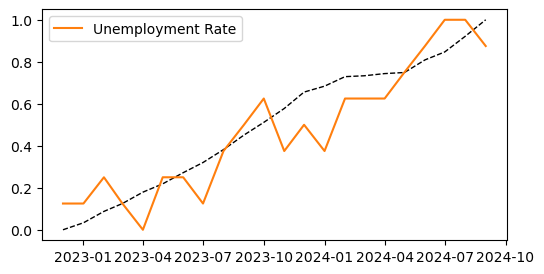

In [225]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 3))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
# gdp = df_macro_scaled.gdp_time
# mean_ir = df_macro_scaled.mean_ir
hpi = df_macro_scaled.hpi
uer = df_macro_scaled.uer

# # GDP
# ax[0].plot(x, default, label='Default', c='k', ls='--', lw=1)
# ax[0].plot(x, gdp, label='GDP')
# ax[0].legend()

# Unemployment Rate
ax.plot(x, default, label=None, c='k', ls='--', lw=1)
ax.plot(x, uer, label='Unemployment Rate', c='C1')
ax.legend()

# # House Price Index
# ax[2].plot(x, default, label=None, c='k', ls='--', lw=1)
# ax[2].plot(x, hpi, label='HPI', c='C2')
# ax[2].legend()

# # Mean IR
# ax[3].plot(x, default, label=None, c='k', ls='--', lw=1)
# ax[3].plot(x, mean_ir, label='Mean IR', c='C3')
# ax[3].legend()
# ax[3].set_xlabel('Time stamp')

plt.show()

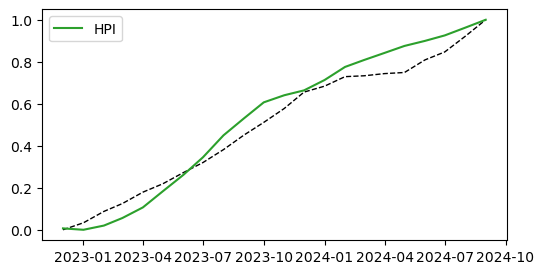

In [246]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 3))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
# gdp = df_macro_scaled.gdp_time
# mean_ir = df_macro_scaled.mean_ir
hpi = df_macro_scaled.hpi
# uer = df_macro_scaled.uer

# # GDP
# ax[0].plot(x, default, label='Default', c='k', ls='--', lw=1)
# ax[0].plot(x, gdp, label='GDP')
# ax[0].legend()

# Unemployment Rate
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, uer, label='Unemployment Rate', c='C1')
# ax.legend()

# # House Price Index
ax.plot(x, default, label=None, c='k', ls='--', lw=1)
ax.plot(x, hpi, label='HPI', c='C2')
ax.legend()

# # Mean IR
# ax[3].plot(x, default, label=None, c='k', ls='--', lw=1)
# ax[3].plot(x, mean_ir, label='Mean IR', c='C3')
# ax[3].legend()
# ax[3].set_xlabel('Time stamp')

plt.show()

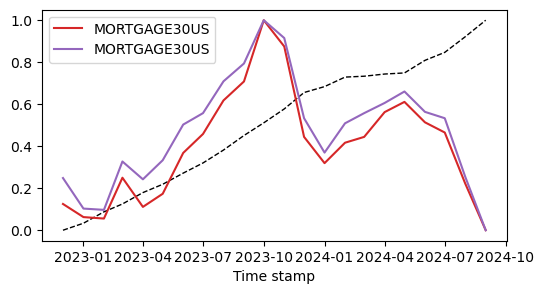

In [288]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 3))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
# gdp = df_macro_scaled.gdp_time
ir30 = df_macro_scaled.ir30
ir15 = df_macro_scaled.ir15
# hpi = df_macro_scaled.hpi
# uer = df_macro_scaled.uer

# # GDP
# ax[0].plot(x, default, label='Default', c='k', ls='--', lw=1)
# ax[0].plot(x, gdp, label='GDP')
# ax[0].legend()

# Unemployment Rate
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, uer, label='Unemployment Rate', c='C1')
# ax.legend()

# # House Price Index
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, hpi, label='HPI', c='C2')
# ax.legend()

# IR
ax.plot(x, default, label=None, c='k', ls='--', lw=1)
ax.plot(x, ir30, label='MORTGAGE30US', c='C3')
ax.plot(x, ir15, label='MORTGAGE30US', c='C4')
ax.legend()
ax.set_xlabel('Time stamp')

plt.show()

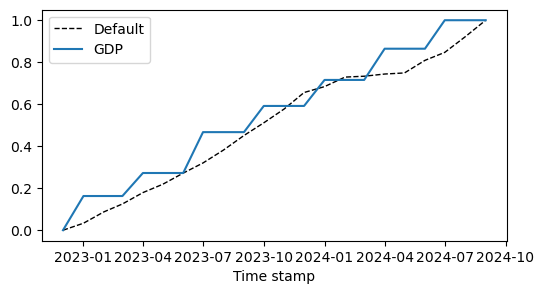

In [327]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 3))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
gdp = df_macro_scaled.GDP
# ir30 = df_macro_scaled.ir30
# ir15 = df_macro_scaled.ir15
# hpi = df_macro_scaled.hpi
# uer = df_macro_scaled.uer

# GDP
ax.plot(x, default, label='Default', c='k', ls='--', lw=1)
ax.plot(x, gdp, label='GDP')
ax.legend()

# Unemployment Rate
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, uer, label='Unemployment Rate', c='C1')
# ax.legend()

# # House Price Index
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, hpi, label='HPI', c='C2')
# ax.legend()

# # IR
# ax.plot(x, default, label=None, c='k', ls='--', lw=1)
# ax.plot(x, ir30, label='MORTGAGE30US', c='C3')
# ax.plot(x, ir15, label='MORTGAGE30US', c='C4')
# ax.legend()
ax.set_xlabel('Time stamp')

plt.show()

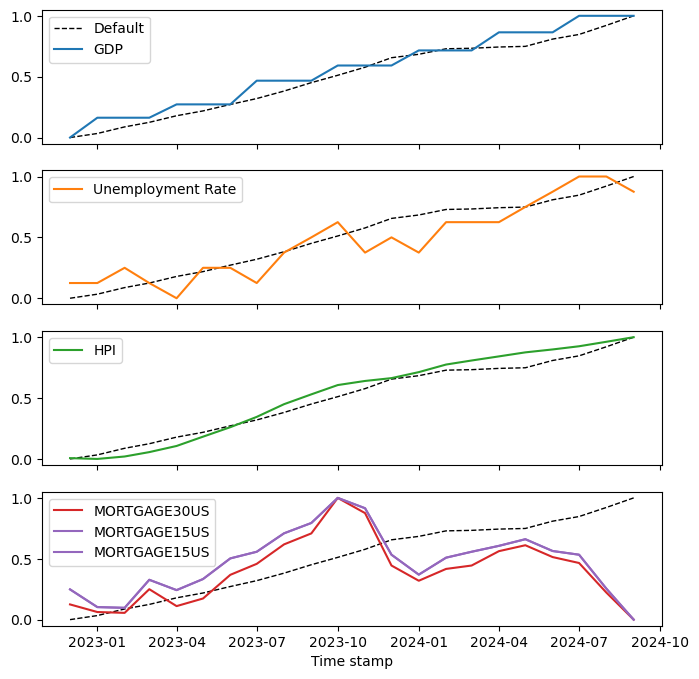

In [328]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8, 8))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
gdp = df_macro_scaled.GDP
ir15 = df_macro_scaled.ir15
ir30 = df_macro_scaled.ir30
hpi = df_macro_scaled.hpi
uer = df_macro_scaled.uer

# GDP
ax[0].plot(x, default, label='Default', c='k', ls='--', lw=1)
ax[0].plot(x, gdp, label='GDP')
ax[0].legend()

# Unemployment Rate
ax[1].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[1].plot(x, uer, label='Unemployment Rate', c='C1')
ax[1].legend()

# House Price Index
ax[2].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[2].plot(x, hpi, label='HPI', c='C2')
ax[2].legend()

# IR
ax[3].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[3].plot(x, ir30, label='MORTGAGE30US', c='C3')
ax[3].plot(x, ir15, label='MORTGAGE15US', c='C4')
ax[3].legend()
ax[3].set_xlabel('Time stamp')

plt.show()

Features:

- Credit score
- Income
- Demographics/Geography (aggregate features)


Macroeconomics

- GDP
- Unemployment rate
- Interest rates
- 

# RMBS

In [3]:
%%time
path = '../datasets/RMBS/'
df = pd.read_csv(path+'mortgage.csv')

CPU times: user 376 ms, sys: 80 ms, total: 456 ms
Wall time: 471 ms


In [4]:
df

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0


Missing Values

In [6]:
df.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [8]:
df.sample(3)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
541920,42599,48,29,32,149,141471.21,76.432784,6.590,146.45,2.715903,...,0,0,150000.0,801,54.6,6.590,217.37,0,0,0
40822,4195,32,25,28,146,358400.00,97.266280,8.175,186.12,1.104163,...,0,0,358400.0,679,80.0,8.000,226.29,0,0,0
58485,5983,60,22,23,142,112614.95,90.565943,2.001,189.82,2.836358,...,1,0,120700.0,506,85.0,2.001,216.77,0,0,0


<Axes: ylabel='Frequency'>

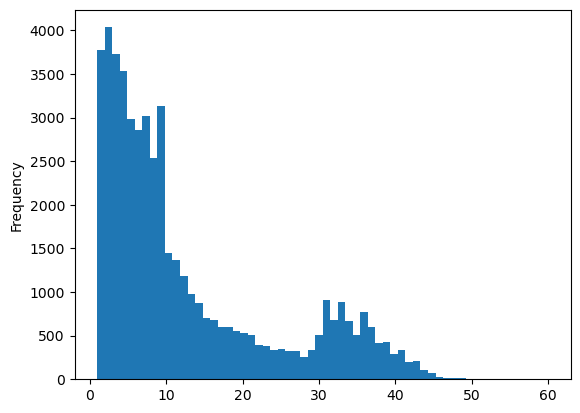

In [24]:
df.groupby('id')['time'].count().sort_values().plot(kind='hist', bins=60, logy=False)

<Axes: xlabel='time'>

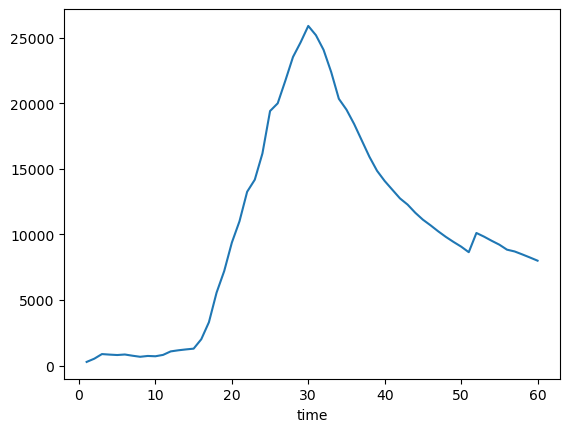

In [105]:
df.groupby('time')['id'].nunique().plot()

<Axes: xlabel='time'>

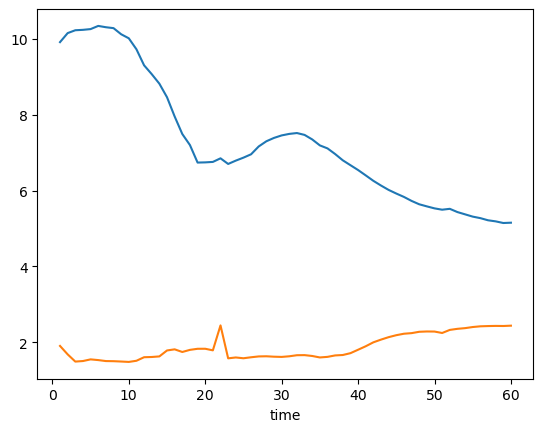

In [123]:

df.groupby('time')['interest_rate_time'].mean().plot()
df.groupby('time')['interest_rate_time'].std().plot()

<Axes: xlabel='time'>

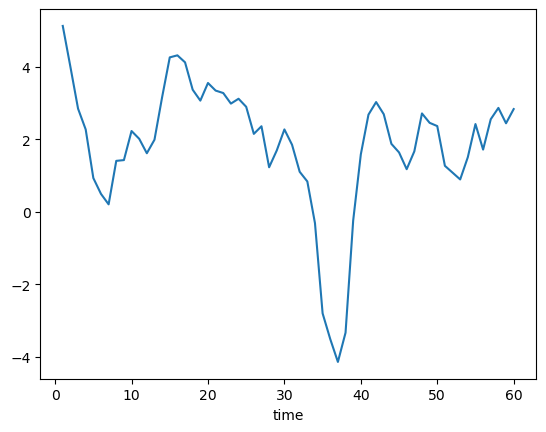

In [40]:
df.groupby('time')['gdp_time'].first().plot()

<Axes: xlabel='time'>

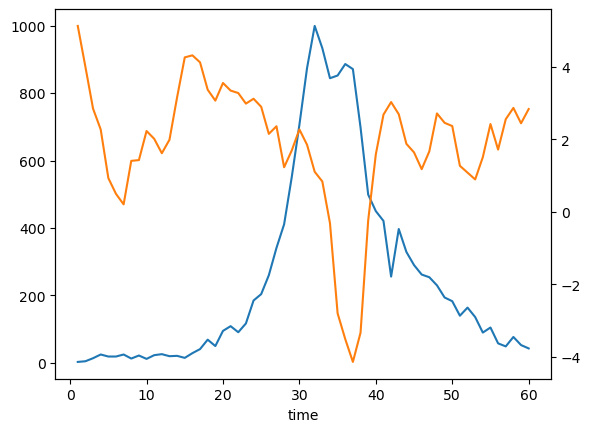

In [47]:
fig, ax = plt.subplots()
df.loc[df.status_time == 1].groupby('time')['status_time'].sum().plot(ax=ax)

ax1 = ax.twinx()
df.groupby('time')['gdp_time'].first().plot(ax=ax1, color='tab:orange')

<Axes: xlabel='time'>

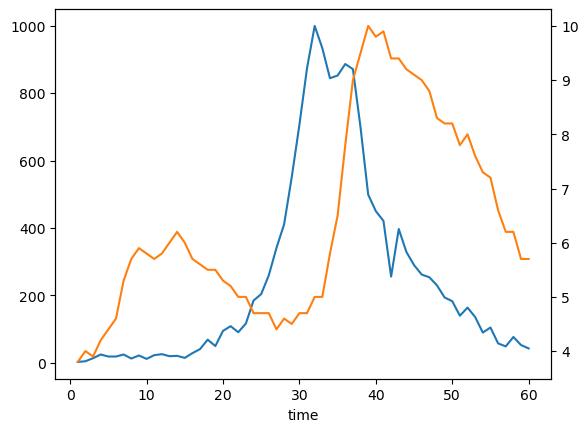

In [54]:
fig, ax = plt.subplots()
df.loc[df.status_time == 1].groupby('time')['status_time'].sum().plot(ax=ax)

ax1 = ax.twinx()
df.groupby('time')['uer_time'].first().shift(0).plot(ax=ax1, color='tab:orange')

In [128]:
default = df.loc[df.status_time == 1].groupby('time')['status_time'].sum().rename('default')
default.head()

time
1     3
2     5
3    14
4    25
5    19
Name: default, dtype: int64

In [131]:
mean_ir = df.groupby('time')['interest_rate_time'].mean()
mean_ir.head()

time
1     9.912191
2    10.150081
3    10.225566
4    10.236245
5    10.255770
Name: interest_rate_time, dtype: float64

In [140]:
macro_vars = ['hpi_time', 'gdp_time', 'uer_time']
df_macro = pd.concat([default, df.groupby('time')[macro_vars].first()], axis=1)
df_macro.head(3)

,default,hpi_time,gdp_time,uer_time
time,,,,
1,3,107.83,5.132464,3.8
2,5,110.90,4.002023,4.0
3,14,113.56,2.847896,3.9


In [142]:
macro_vars = ['hpi_time', 'gdp_time', 'uer_time']
df_macro = df.groupby('time')[macro_vars].first()
df_macro.head(3)

,hpi_time,gdp_time,uer_time
time,,,
1,107.83,5.132464,3.8
2,110.90,4.002023,4.0
3,113.56,2.847896,3.9


In [151]:
macro_vars = ['hpi_time', 'gdp_time', 'uer_time']
df_macro = df.groupby('time')[macro_vars].first()
df_macro.head(3)

scaler = MinMaxScaler()

df_macro = pd.concat([default, mean_ir, df_macro], axis=1)
scaler.fit(df_macro)
df_macro_scaled = pd.DataFrame(scaler.fit_transform(df_macro), columns=['default', 'mean_ir']+macro_vars)

In [152]:
df_macro_scaled.head()

,default,mean_ir,hpi_time,gdp_time,uer_time
0,0.000000,0.917748,0.000000,1.000000,0.000000
1,0.002008,0.963541,0.025916,0.878174,0.032258
2,0.011044,0.978072,0.048371,0.753796,0.016129
3,0.022088,0.980128,0.074793,0.691892,0.064516
4,0.016064,0.983886,0.102988,0.547230,0.096774


<Axes: >

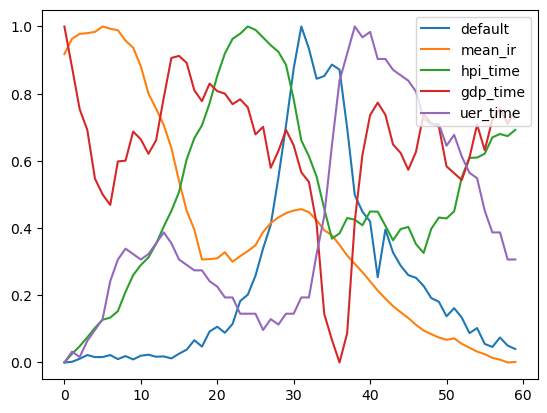

In [154]:
df_macro_scaled.plot()

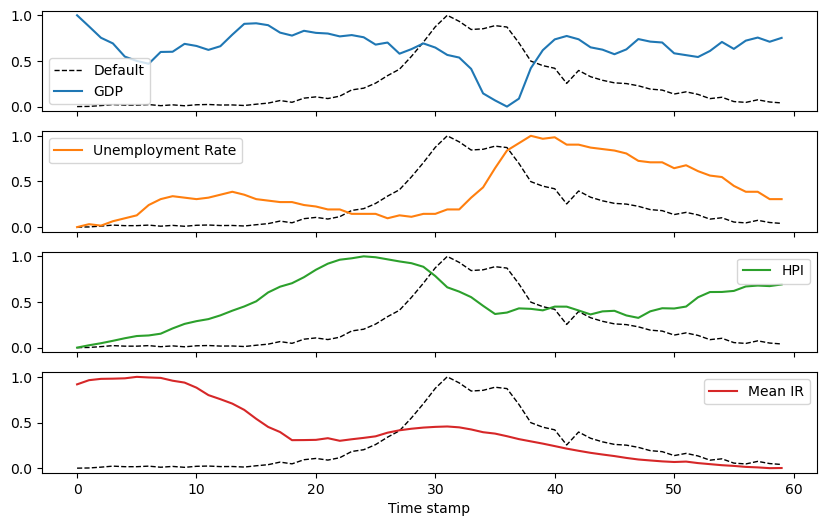

In [184]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 6))

# Variables
x = df_macro_scaled.index
default = df_macro_scaled.default
gdp = df_macro_scaled.gdp_time
mean_ir = df_macro_scaled.mean_ir
hpi = df_macro_scaled.hpi_time
uer = df_macro_scaled.uer_time

# GDP
ax[0].plot(x, default, label='Default', c='k', ls='--', lw=1)
ax[0].plot(x, gdp, label='GDP')
ax[0].legend()

# Unemployment Rate
ax[1].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[1].plot(x, uer, label='Unemployment Rate', c='C1')
ax[1].legend()

# House Price Index
ax[2].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[2].plot(x, hpi, label='HPI', c='C2')
ax[2].legend()

# Mean IR
ax[3].plot(x, default, label=None, c='k', ls='--', lw=1)
ax[3].plot(x, mean_ir, label='Mean IR', c='C3')
ax[3].legend()
ax[3].set_xlabel('Time stamp')

plt.show()